In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv('loan_approval.csv')

df.head()


,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


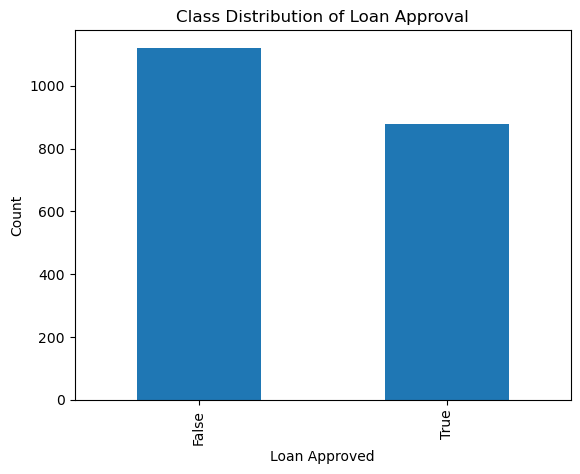

In [3]:
df['loan_approved'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Loan Approval')
plt.xlabel('Loan Approved')
plt.ylabel('Count')
plt.show()


In [4]:
print(df.isnull().sum())

num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print(df.isnull().sum())


name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64
name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64


In [5]:
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

df.head()


,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,46,326,113810,389,39698,27,50.0,False
1,218,989,44592,729,15446,28,55.0,False
2,1605,763,33278,584,11189,13,45.0,False
3,674,1793,127196,344,48823,29,50.0,False
4,1934,841,66048,496,47174,4,25.0,False


In [6]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()


,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,46,326,0.673565,-1.152134,1.013076,0.557034,-0.358497,False
1,218,989,-1.333961,0.965919,-0.694358,0.641960,-0.090161,False
2,1605,763,-1.662100,0.062632,-0.994067,-0.631939,-0.626832,False
3,674,1793,1.061799,-1.432464,1.655511,0.726887,-0.358497,False
4,1934,841,-0.711674,-0.485570,1.539415,-1.396279,-1.700175,False


In [7]:
X = df.drop('loan_approved', axis=1)
y = df['loan_approved']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f'Training size: {X_train.shape}, Test size: {X_test.shape}')


Training size: (1600, 7), Test size: (400, 7)


In [12]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'ANN': MLPClassifier(max_iter=500),
    'Gradient Boosting': GradientBoostingClassifier()  
}



Training: Logistic Regression


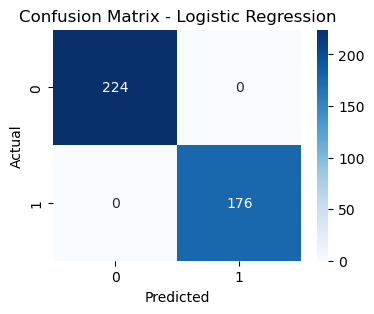


Training: KNN


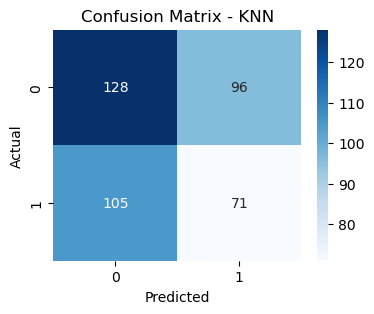


Training: Random Forest


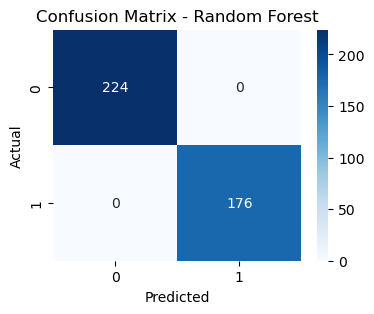


Training: SVM


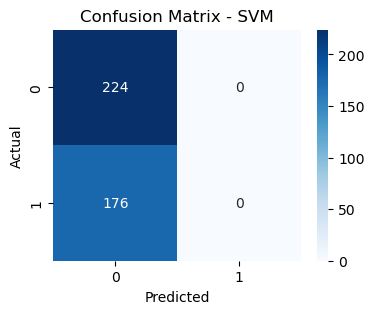


Training: Naive Bayes


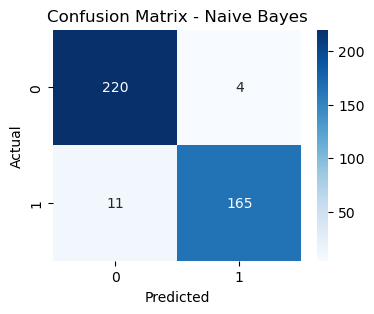


Training: ANN


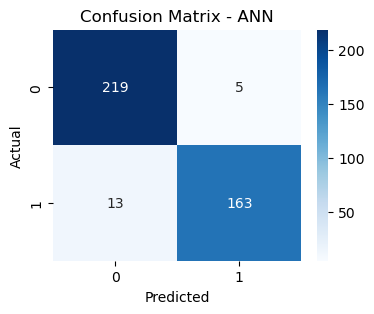


Training: Gradient Boosting


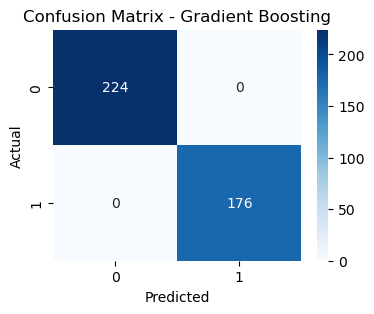

In [9]:
results = []

for name, model in models.items():
    print(f"\nTraining: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Confusion Matrix': cm
    })
    
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [11]:
results_df = pd.DataFrame(results)

results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']].sort_values(by='Accuracy', ascending=False)


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,1.0000,1.000000,1.000000,1.000000
2,Random Forest,1.0000,1.000000,1.000000,1.000000
6,Gradient Boosting,1.0000,1.000000,1.000000,1.000000
4,Naive Bayes,0.9625,0.976331,0.937500,0.956522
5,ANN,0.9550,0.970238,0.926136,0.947674
3,SVM,0.5600,0.000000,0.000000,0.000000
1,KNN,0.4975,0.425150,0.403409,0.413994
